<a href="https://colab.research.google.com/github/imranrahman1997/TensorFlow-Course/blob/master/mnist_resnet_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import IPython
import tensorflow as tf
import keras 
import seaborn as sns
import warnings as w
from sklearn.model_selection import train_test_split
import cv2

%load_ext autoreload
%autoreload 2

np.random.seed(1)
w.filterwarnings('ignore')

In [2]:
training_path = "/content/drive/My Drive/Dataset/train.csv"
testing_path = "/content/drive/My Drive/Dataset/test.csv"

In [3]:
train = pd.read_csv(training_path)
test = pd.read_csv(testing_path)

In [4]:
train.shape

(42000, 785)

In [9]:
num_example_train = train.shape[0]
num_example_test = test.shape[0]
n_h = 32
n_w = 32
n_c = 3

In [10]:
Train_input_images = np.zeros((num_example_train, n_h, n_w, n_c))
Test_input_images = np.zeros((num_example_test, n_h, n_w, n_c))

In [12]:
for example in range(num_example_train):
    Train_input_images[example,:28,:28,0] = train.iloc[example, 1:].values.reshape(28,28)
    Train_input_images[example,:28,:28,1] = train.iloc[example, 1:].values.reshape(28,28)
    Train_input_images[example,:28,:28,2] = train.iloc[example, 1:].values.reshape(28,28)
    
for example in range(num_example_test):
    Test_input_images[example,:28,:28,0] = test.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,1] = test.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,2] = test.iloc[example, :].values.reshape(28,28)

In [13]:
for example in range(num_example_train):
    Train_input_images[example] = cv2.resize(Train_input_images[example], (n_h, n_w))
    
for example in range(num_example_test):
    Test_input_images[example] = cv2.resize(Test_input_images[example], (n_h, n_w))

In [14]:
Train_labels = np.array(train.iloc[:, 0])

In [15]:
print("Shape of train input images : ", Train_input_images.shape)
print("Shape of test input images : ", Test_input_images.shape)
print("Shape of train labels : ", Train_labels.shape)

Shape of train input images :  (42000, 32, 32, 3)
Shape of test input images :  (28000, 32, 32, 3)
Shape of train labels :  (42000,)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=27,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=False)

validation_datagen = ImageDataGenerator()

In [17]:
pretrained_model = keras.applications.resnet50.ResNet50(input_shape=(n_h, n_w, n_c),
                                                        include_top=False, weights='imagenet')

model = keras.Sequential([
    pretrained_model,
    keras.layers.Flatten(),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

94773248/94765736 [==============================] - 1s 0us/step


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 60)                122940    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 23,711,262
Trainable params: 23,658,142
Non-trainable params: 53,120
_________________________________________________________________


In [19]:
Optimizer = 'RMSprop'

model.compile(optimizer=Optimizer, 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
train_images, dev_images, train_labels, dev_labels = train_test_split(Train_input_images, 
                                                                      Train_labels,
                                                                      test_size=0.1, train_size=0.9,
                                                                      shuffle=True,
                                                                      random_state=44)
test_images = Test_input_images

In [21]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999999):
            print("Stop training!")
            self.model.stop_training = True

In [22]:
callbacks = myCallback()

In [24]:
EPOCHS = 20
batch_size = 212

history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size=batch_size),
                         steps_per_epoch=train_images.shape[0] / batch_size, 
                         epochs=EPOCHS,   
                         validation_data=validation_datagen.flow(dev_images,dev_labels,
                                                                 batch_size=batch_size),
                         validation_steps=dev_images.shape[0] / batch_size,
                         callbacks=[callbacks])

Epoch 1/20
179/178 [==============================] - 24s 136ms/step - loss: 0.1354 - accuracy: 0.9681 - val_loss: 1.1949 - val_accuracy: 0.9298
Epoch 2/20
179/178 [==============================] - 24s 135ms/step - loss: 0.1343 - accuracy: 0.9732 - val_loss: 0.7087 - val_accuracy: 0.9074
Epoch 3/20
179/178 [==============================] - 24s 135ms/step - loss: 0.1101 - accuracy: 0.9733 - val_loss: 0.0787 - val_accuracy: 0.9807
Epoch 4/20
179/178 [==============================] - 24s 136ms/step - loss: 0.1070 - accuracy: 0.9748 - val_loss: 1.6613 - val_accuracy: 0.9219
Epoch 5/20
179/178 [==============================] - 24s 135ms/step - loss: 0.0971 - accuracy: 0.9764 - val_loss: 0.5929 - val_accuracy: 0.9476
Epoch 6/20
179/178 [==============================] - 24s 137ms/step - loss: 0.1037 - accuracy: 0.9766 - val_loss: 0.2377 - val_accuracy: 0.9848
Epoch 7/20
179/178 [==============================] - 24s 134ms/step - loss: 0.0898 - accuracy: 0.9786 - val_loss: 3.1160 - val_ac

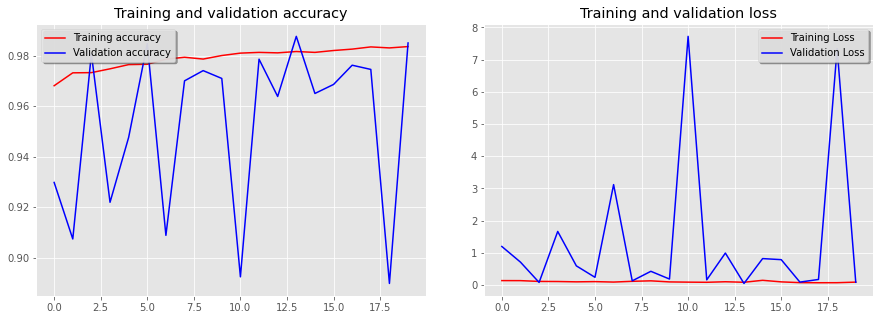

In [25]:
plt.style.use('ggplot')  
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.15, hspace=0.025)
ax = ax.ravel()

ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc="upper left", shadow=True, frameon=True, fancybox=True, framealpha=0.9)

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend(loc="upper right", shadow=True, frameon=True, fancybox=True, framealpha=0.9)

plt.show()

In [26]:
prediction = model.predict(test_images)

In [28]:
prediction

array([[4.5795293e-08, 2.4626896e-08, 9.9997675e-01, ..., 1.3358922e-05,
        2.3546954e-06, 3.1446700e-07],
       [9.9999595e-01, 1.3575519e-11, 4.8187797e-08, ..., 1.3496138e-10,
        2.1337087e-08, 8.0572067e-07],
       [4.5597339e-17, 6.2627371e-23, 4.7839747e-18, ..., 1.6823148e-14,
        1.4814448e-13, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [5.2640468e-15, 3.5636400e-15, 1.0000000e+00, ..., 2.2507569e-10,
        2.1861976e-11, 1.3712452e-12]], dtype=float32)

In [29]:
print(np.argmax(prediction, axis = 1))

[2 0 9 ... 3 9 2]


In [30]:
results = np.argmax(prediction, axis = 1)

In [31]:
results = pd.Series(results, name = "Label")

In [32]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [33]:
submission.to_csv("/content/drive/My Drive/Dataset/MNIST-CNN_resnet.csv",index=False)
